# Unstructured Group Assignment 1

### Group Members: Jose Currea, Jenna Ferguson, Evan Hadd, Ramzi Kattan, Hadley Krummel

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import Counter
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import itertools
from sklearn.manifold import MDS
import statsmodels.api as sm  # For the OLS regression
import numpy as np            # For numerical operations like log transformations
import matplotlib.pyplot as plt  # For plotting
from collections import Counter  # For counting word occurrences
from scipy import stats        # For t-statistic and p-value calculations
from sklearn import manifold

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines

## Scraper Development

In [2]:
# def scrape_page(url):
#     response = requests.get(url)
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.text, "html.parser")

#         messages = soup.find_all("div", class_ = "Message userContent")

#         dates = soup.find_all("time")

#         data = []

#         for message, date in zip(messages, dates):
#             message_text = message.get_text(strip = True)
#             date_text = date.get("title")
#             data.append({"Date": date_text, "Message": message_text})

#         return data


# def scrape_forum(base_url, total_pages):
#     all_data = []

#     for page_num in range(1, total_pages + 1):
#         page_url = f"{base_url}/p{page_num}"
#         print(f"Scraping page {page_num}: {page_url}")
#         page_data = scrape_page(page_url)
#         all_data.extend(page_data)
#     return all_data

In [3]:
# base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
# total_pages = 300
# forum_data = scrape_forum(base_url, total_pages)
# messagedata = pd.DataFrame(forum_data)
# messagedata.to_csv("messagedata.csv", index = False)
# len(messagedata)

## Task A

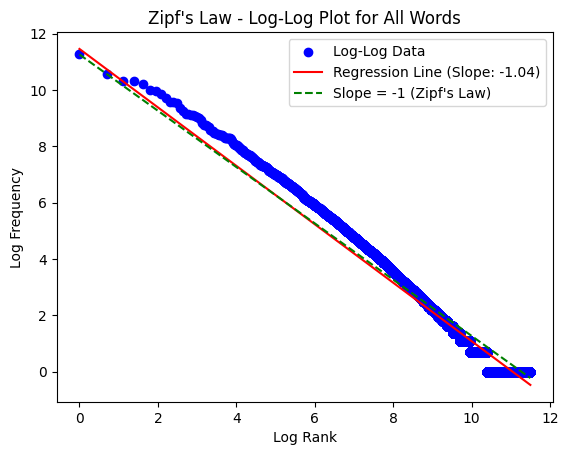

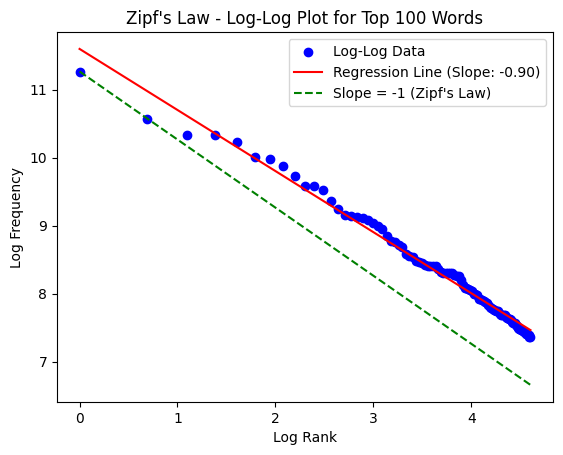

In [4]:
# Importing Data
messagedf = pd.read_csv("messagedata.csv")
messagedf['Message'] = messagedf['Message'].fillna('')

# Counting Number of Words and Sorting
words = ' '.join(messagedf['Message']).lower().split()
word_counts = Counter(words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts_100 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# All Words

# Finding Ranks and Frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = np.array([count for word, count in sorted_word_counts])

# Log Transformations
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Econometric Regression
X = sm.add_constant(log_ranks)
model = sm.OLS(log_frequencies, X)
results = model.fit()

# Graphing Results 
zipf_line = log_frequencies[0] + (-1) * (log_ranks - log_ranks[0])

plt.scatter(log_ranks, log_frequencies, color='blue', label='Log-Log Data')
plt.plot(log_ranks, results.predict(X), color='red', label=f'Regression Line (Slope: {results.params[1]:.2f})')
plt.plot(log_ranks, zipf_line, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for All Words')
plt.legend()
plt.show()

# Top 100

# Finding Ranks and Frequencies
ranks_100 = np.arange(1, len(sorted_word_counts_100) + 1)
frequencies_100 = np.array([count for word, count in sorted_word_counts_100])

# Log Transformations
log_ranks_100 = np.log(ranks_100)
log_frequencies_100 = np.log(frequencies_100)

# Econometric Regression
X_100 = sm.add_constant(log_ranks_100)
model_100 = sm.OLS(log_frequencies_100, X_100)
results_100 = model_100.fit()

# Graphing Results 
zipf_line_100 = log_frequencies_100[0] + (-1) * (log_ranks_100 - log_ranks_100[0])

plt.scatter(log_ranks_100, log_frequencies_100, color='blue', label='Log-Log Data')
plt.plot(log_ranks_100, results_100.predict(X_100), color='red', label=f'Regression Line (Slope: {results_100.params[1]:.2f})')
plt.plot(log_ranks_100, zipf_line_100, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for Top 100 Words')
plt.legend()
plt.show()

In [5]:

# Extract the slope and its standard error
slope = results.params[1]
std_err = results.bse[1]

# Calculate the t-statistic
t_stat = (slope - (-1)) / std_err

# Degrees of freedom (number of observations - number of parameters)
df = len(log_ranks) - 2  # 2 parameters: slope and intercept

# Calculate the p-value for a two-tailed t-test
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
print(f"Slope: {slope:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Repeat for Top 100 Words
slope_100 = results_100.params[1]
std_err_100 = results_100.bse[1]
t_stat_100 = (slope_100 - (-1)) / std_err_100
df_100 = len(log_ranks_100) - 2
p_value_100 = 2 * (1 - stats.t.cdf(abs(t_stat_100), df_100))
print(f"Slope (Top 100): {slope_100:.4f}, t-statistic: {t_stat_100:.4f}, p-value: {p_value_100:.4f}")

Slope: -1.0383, t-statistic: -39.9823, p-value: 0.0000
Slope (Top 100): -0.8972, t-statistic: 10.5502, p-value: 0.0000


### Statistical Description

According to our statistical exploration, the slopes found in the previous problem are statistically different than the zipf's law slope of -1. Since the t scores are large and the p values are small, this means that we reject the null hypothesis. The standard deviations that result from the regression are extremely small, which is what causes a high t score and therefore a statistically significant difference between the slope produced and the -1 slope of the null hypothesis. 

# Task B

Below is the code used to scrape kelly blue book for more makes and models or cars in the replacement file. The resulting file is saved as 'merged-1.csv' and is referenced as such in the code.

In [6]:
# # ChatGPT Support
# # Set up ChromeDriver path
# driver_path = "/Users/ramzikattan/Downloads/chromedriver-mac-arm64/chromedriver"
# chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

# # Configure Chrome options
# chrome_options = Options()
# chrome_options.binary_location = chrome_path

# # Set up the Chrome WebDriver service
# service = Service(driver_path)
# driver = webdriver.Chrome(service=service, options=chrome_options)

# # Open the webpage
# carurl = "https://www.kbb.com/car-make-model-list/used/view-all/make/"
# driver.get(carurl)
# time.sleep(5)  # Wait for the page to load

# # Parse the page with BeautifulSoup
# html = driver.page_source
# soup = BeautifulSoup(html, 'html.parser')

# # Close the browser after fetching the page
# driver.quit()

# # Find all table rows
# rows = soup.find_all("tr")
# print(f"Number of rows fetched: {len(rows)}")

# make_model_data = []

# # Loop through each row and extract make, model, and years
# for row in rows:
#     tds = row.find_all("td", class_="css-irk93x ee33uo33")
    
#     # Check if the expected number of <td> elements exist
#     if len(tds) >= 3:
#         try:
#             # Extract model from the second <td>
#             model_td = tds[0]
#             model = model_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
#             # Extract make from the third <td>
#             make_td = tds[1]
#             make = make_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
#             # Append the extracted data
#             make_model_data.append({
#                 "make": make,
#                 "model": model,
#             })
#         except Exception as e:
#             print(f"Error parsing row: {e}")

# makemodeldf = pd.DataFrame(make_model_data)
# makemodeldf.to_csv("make_model_data.csv")

In [7]:
# # Merging the two dataframes to account for most car brands
# makemodeldf = pd.read_csv("make_model_data.csv")
# makemodeldf['make'] = makemodeldf['make'].str.lower()
# makemodeldf['model'] = makemodeldf['model'].str.lower()
# print(len(makemodeldf))

# makemodeldf2 = pd.read_csv("Replacement_words.csv")
# makemodeldf2.rename(columns={'Brand': 'make'}, inplace=True)
# makemodeldf2.rename(columns={'Model': 'model'}, inplace=True)
# makemodeldf2['make'] = makemodeldf2['make'].str.lower()
# makemodeldf2['model'] = makemodeldf2['model'].str.lower()
# print(len(makemodeldf2))

# # Save to CSV
# mergedmakemodel = pd.concat([makemodeldf, makemodeldf2], ignore_index=True)
# mergedmakemodel = mergedmakemodel.drop_duplicates()
# mergedmakemodel.to_csv("merged.csv")
# print(len(mergedmakemodel))

In [8]:
mergedmakemodel = pd.read_csv('merged-1.csv')

In [9]:
mergedmakemodel.head()

,Unnamed: 0,make,model
0,0,acura,cl
1,1,acura,ilx
2,2,acura,integra
3,3,acura,legend
4,4,acura,mdx


In [10]:
mergedmakemodel = mergedmakemodel.drop('Unnamed: 0', axis=1)

In [11]:
mergedmakemodel.head()

,make,model
0,acura,cl
1,acura,ilx
2,acura,integra
3,acura,legend
4,acura,mdx


In [12]:
stop_words = set(stopwords.words('english'))
model_to_brand = dict(zip(mergedmakemodel['model'].str.lower(), mergedmakemodel['make'].str.lower()))
brands_set = set(model_to_brand.values())

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])

    return filtered_brands, new_message 

messages = messagedf['Message']
brand_counter = Counter()

for message in messages:
    brands, new_message = replacements(message, model_to_brand, brands_set)
    brand_counter.update(brands)

brands_to_remove = ['car', 'sedan', 'problem', 'seat', 'mini']

for brand in brands_to_remove:
    brand_counter.pop(brand, None)

top_10 = brand_counter.most_common(10)

print("Top 10 Brands by Frequency:")
for brand, count in top_10:
    print(f"{brand.capitalize()}: {count}")


Top 10 Brands by Frequency:
Infiniti: 11162
Lexus: 9380
Bmw: 5111
Acura: 3232
Audi: 2234
Honda: 1691
Cadillac: 1319
Toyota: 1000
Nissan: 835
Chrysler: 639


# Task C

In [13]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]

def find_co_occurrences(message, top_10_brands, distance=7):
    words = message.split()
    found_brands = []
    
    for i, word in enumerate(words):
        if word in top_10_brands:
            found_brands.append((word, i)) 
    
    co_occurrences = set()
    for (brand1, idx1), (brand2, idx2) in itertools.combinations(found_brands, 2):
        if abs(idx1 - idx2) <= distance:  # Check distance in terms of word indices
            co_occurrences.add(tuple(sorted((brand1, brand2))))  # Use sorted tuple for co-occurrence
    
    return co_occurrences

brand_counter = Counter()
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Now find co-occurrences using the replaced message
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, distance=10)
    co_occurrence_counter.update(co_occurrences)

    
def calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand1] / total_messages 
    P_B = brand_counter[brand2] / total_messages  
    
    # Combine counts for both (brand1, brand2) and (brand2, brand1)
    P_AB = (co_occurrence_counter[(brand1, brand2)] + co_occurrence_counter[(brand2, brand1)]) / total_messages #if (brand1, brand2) in co_occurrence_counter or (brand2, brand1) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

lift_results = []
for (brand1, brand2) in itertools.combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages)
    lift_results.append((brand1, brand2, lift))

lift_df = pd.DataFrame(lift_results, columns=['Brand1', 'Brand2', 'Lift'])
lift_df.sort_values(by='Lift', ascending=False, inplace=True)

lift_matrix = lift_df.pivot(index='Brand1', columns='Brand2', values='Lift')
lift_matrix = lift_matrix.combine_first(lift_matrix.T)
lift_matrix.fillna(0, inplace=True)

#lift_df.to_csv('brand_lift_ratios.csv', index=False)
print(lift_matrix)

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])
    return filtered_brands, new_message


             acura      audi       bmw  cadillac  chrysler     honda  infiniti     lexus    nissan    toyota
acura     0.000000  0.806116  0.525801  0.668587  0.392231  1.177504  0.868235  0.820409  0.528063  0.385236
audi      0.806116  0.000000  0.773832  0.814540  0.441352  0.357385  0.752579  0.657885  0.257336  0.261880
bmw       0.525801  0.773832  0.000000  0.647534  0.312336  0.300273  0.775175  0.732822  0.288232  0.381555
cadillac  0.668587  0.814540  0.647534  0.000000  0.391559  0.195043  0.781500  0.750522  0.136204  0.272952
chrysler  0.392231  0.441352  0.312336  0.391559  0.000000  0.416483  0.513177  0.528079  0.337376  0.446039
honda     1.177504  0.357385  0.300273  0.195043  0.416483  0.000000  0.633422  0.540020  1.328006  2.075833
infiniti  0.868235  0.752579  0.775175  0.781500  0.513177  0.633422  0.000000  0.754208  0.783828  0.532198
lexus     0.820409  0.657885  0.732822  0.750522  0.528079  0.540020  0.754208  0.000000  0.589904  0.626907
nissan    0.528063 

# Task D

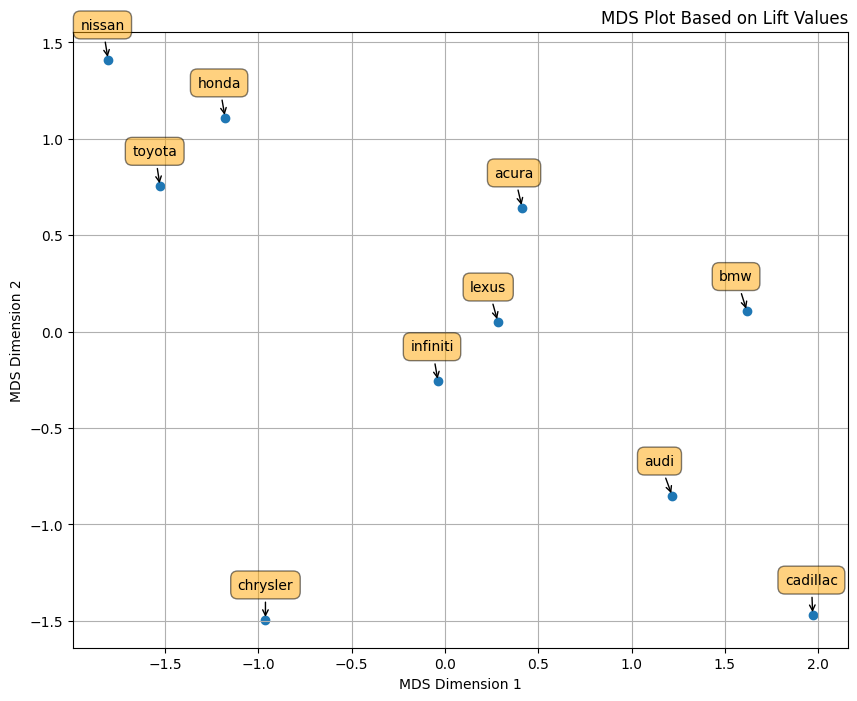

In [14]:
dissimilarity_matrix = 1 / (lift_matrix + 1e-10)
np.fill_diagonal(dissimilarity_matrix.values, 0)  # Set diagonal to zero

# Multidimensional Scaling (MDS)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   random_state=seed, dissimilarity="precomputed")

try:
    results = mds.fit(dissimilarity_matrix)
    coords = results.embedding_
    
except ValueError as e:
    print(f"Error during MDS fitting: {e}")
    coords = np.zeros((len(lift_matrix), 2))  # Placeholder in case of error

# Plotting the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], marker='o')

# Annotate each point with the corresponding brand name
for label, x, y in zip(lift_matrix.index, coords[:, 0], coords[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Left-align the title
plt.title('MDS Plot Based on Lift Values', loc='right')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

# Task E

### Brand Perception
- Lexus, Infiniti, and Acura are positioned close to each other in the MDS plot, indicating that consumers often mention these brands together. This suggests that they are perceived similarly in terms of features, quality, or value proposition in the entry-level luxury segment. JD Power should consider these brands as direct competitors and further investigate the specific attributes that consumers associate with them.
- Audi and BMW are relatively close in the plot but distinctly separate from other brands, indicating a strong presence in the luxury segment with unique positioning. These brands are likely competing for the same high-performance and luxury-focused consumer base. Any marketing or product strategy for these brands should focus on their performance and luxury heritage.

### Brand Clustering
- Toyota, Nissan, and Honda are clustered away from the core luxury segment, indicating that while they may offer entry-level luxury models, they are primarily perceived as value-oriented or non-luxury brands. This could be due to their broader product range that includes more economy and family-oriented vehicles. JD Power could explore the potential for these brands to further penetrate the entry-level luxury market by enhancing luxury features or branding these specific models more distinctly.
- Chrysler is positioned separately from the other brands, which may reflect its divergence from the entry level luxury market. This distinct positioning can be an advantage, but JD Power should monitor whether Chrysler’s brand perception aligns with entry-level luxury or if it is viewed more as a niche brand.




# Task F

In [15]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]
attributes = ['performance', 'luxury', 'price', 'interior', 'power']

def find_co_occurrences(message, top_10_brands, attributes):
    words = message.split()
    found_brands = []
    found_attributes = []

    for word in words:
        if word in top_10_brands:
            found_brands.append(word)
        if word in attributes:
            found_attributes.append(word)
    
    co_occurrences = set()
    for brand in found_brands:
        for attribute in found_attributes:
            co_occurrences.add((brand, attribute))  # No distance check, just record co-occurrences
    
    return co_occurrences

brand_counter = Counter()
attribute_counter = Counter()  # Counter for attributes
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Count attributes in the message
    for word in replaced_message.split():
        if word in attributes:
            attribute_counter[word] += 1
    
    # Find co-occurrences with attributes
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, attributes)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand] / total_messages 
    P_B = attribute_counter[attribute] / total_messages if attribute in attribute_counter else 0
    P_AB = co_occurrence_counter[(brand, attribute)] / total_messages if (brand, attribute) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

# Create a DataFrame for lifts
lift_results = []

for brand in top_10_brands:
    for attribute in attributes:
        lift = calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages)
        lift_results.append((brand, attribute, lift))

# Create a DataFrame with brands as rows and attributes as columns
lift_df = pd.DataFrame(lift_results, columns=['Brand', 'Attribute', 'Lift'])

# Pivot the DataFrame to have brands in rows and attributes in columns
final_lift_matrix = lift_df.pivot(index='Brand', columns='Attribute', values='Lift')

# Fill any NaN values with 0
final_lift_matrix.fillna(0, inplace=True)

# Save to CSV if needed
#final_lift_matrix.to_csv('brand_attribute_lift_ratios.csv', index=True)

# Print the final lift matrix
print(final_lift_matrix)

Attribute  interior    luxury  performance     power     price
Brand                                                         
acura      1.149388  1.050638     1.068455  1.234257  1.085862
audi       1.345691  1.050859     1.099397  1.518328  1.222916
bmw        0.918934  0.899515     1.064660  1.152051  1.196068
cadillac   1.573190  1.186565     1.092033  1.032264  1.233022
chrysler   0.982116  1.312105     1.233030  1.943851  1.473513
honda      1.209149  1.264346     1.157572  1.454970  1.206433
infiniti   0.826130  0.734876     0.812317  0.911650  0.846110
lexus      0.897827  0.879701     0.932515  1.024999  0.980237
nissan     0.969785  1.029217     1.046807  1.516177  0.965324
toyota     1.103312  1.669883     1.218793  1.027139  1.198368


# Task G

The five most frequently discussed attributes we found in this data are interior, luxury, performance, power and price. The brands that these attributes co occur with the most are mentioned below.


### Interior: Cadillac and Audi appear to referred to the most when discussing interior while infiniti and lexus appear the least.
### Luxury: Toyota and Honda are mentioned the most when discussing luxury while infiniti and lexus and mentioned the least.
### Performance: Chrysler and toyota are mentioned most with performance, while infiniti and lexus are discussed the least
### Power: When power is mentioned, crysler and audi are also mentioned most frequently, whereas infiniti and lexus co occur the least with power.
### Price: Crysler and cadillac are mentioned most often with price, and infiniti and nissan occur least with it.

### Strengths
- Audi and Cadillac: Both brands show strong lift values across multiple attributes, particularly in interior (Audi: 1.345, Cadillac: 1.573) and price (Audi: 1.222, Cadillac: 1.233). This suggests that they are perceived as leaders in providing high-quality interiors and justifying their pricing in the luxury segment. This perception aligns well with their positioning as premium brands.
- Honda and Toyota: Both brands have high lift values for luxury (Honda: 1.264, Toyota: 1.669) and performance (Honda: 1.157, Toyota: 1.218). Despite not traditionally being considered luxury brands, their entry-level luxury models seem to be well-regarded in these aspects. This could indicate growing acceptance of these brands in the luxury market.
### Weaknesses
- Infiniti and Lexus: Both brands show lower lift values in luxury (Infiniti: 0.734, Lexus: 0.879) and performance (Infiniti: 0.812, Lexus: 0.932). For brands positioned as luxury, this could indicate that their current models are not perceived as competitive in these key attributes. They may need to invest in enhancing these aspects to improve their market position.
- BMW: The lift value for luxury (0.899) is relatively lower compared to competitors like Cadillac (1.186) and Audi (1.050). BMW might need to focus on reinforcing its luxury credentials to maintain its competitive edge.
Without sentiment analysis, it is difficult to say whether or not these co-occurances occurred with positive or negative connotation. In that regard, we can't say whether or not, for example, toyota is the most luxurious car. We can say, however, that when car enthusiasts are on the topic of luxury, they are often also talking about toyotas. What's more telling is that in these luxury discussions, infiniti and lexus are not being mentioned, which are meant to be positioned as more luxurious than toyota or honda. A deeper sentiment is suggested in order to uncover if these conversations are indicating that toyota and honda are, say, comparable to luxury cars. These findings hightlight a lot of potential areas to delve deeper into this discussion data, since there are many findings that are unexpected compared to what we know about the ideal marketing of these brands.



# Task H

### Defining the Aspirational Phrases

In [16]:
# we have to go back through messagedata_final.csv and convert aspirational phrases to "aspire"

aspirational_phrases = [
    'i want this car', 'forever car', 'wish i had', 'dream car', 'desire', 'my favorite', 'i wish', 'must have', 'can’t wait to drive', 'ultimate goal', 'someday car', 'my future car', 
    'hope to own', 'bucket list car', 'always wanted', 'the one for me', 'perfect car','my ideal ride', 'one day it will be mine', 'dreaming of this car', 'can see myself driving this',
    'this car is my goal'
]
# Create a case-insensitive regex pattern from the list of phrases
pattern = re.compile('|'.join(re.escape(phrase) for phrase in aspirational_phrases), re.IGNORECASE)

### Making a new dataframe for this purpose

In [17]:
Hmessages = pd.read_csv('messagedata_final.csv')

In [18]:
Hmessages.head()

,Date,Message
0,"March 23, 2002 12:04PM",Entry level performance luxury sedans are a ho...
1,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
2,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
3,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
4,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...


### Replace phrases with the word "aspire"

In [19]:
# Create a case-insensitive regex pattern from the list of phrases
pattern = re.compile('|'.join(re.escape(phrase) for phrase in aspirational_phrases), re.IGNORECASE)

# Function to replace any matching phrase with 'aspire'
def replace_aspirational_phrases(message):
    if isinstance(message, str):  # Ensure the value is a string
        return pattern.sub('aspire', message)
    else:
        return message  # If not a string, return as is

# Apply the function to the 'Message' column
Hmessages['Modified_Message'] = Hmessages['Message'].apply(replace_aspirational_phrases)

# Display the new DataFrame with the modified message
print(Hmessages)

                           Date                                            Message                                   Modified_Message
0        March 23, 2002 12:04PM  Entry level performance luxury sedans are a ho...  Entry level performance luxury sedans are a ho...
1        March 24, 2002 10:54PM  I personally think that with a few tweaks the ...  I personally think that with a few tweaks the ...
2        March 25, 2002 12:06AM  I am debating a new purchase and these two are...  I am debating a new purchase and these two are...
3        March 25, 2002 10:02AM  Great handling, RWD, excellent engine and the ...  Great handling, RWD, excellent engine and the ...
4         March 25, 2002 4:04PM  And no manual tranny. That may not matter to y...  And no manual tranny. That may not matter to y...
...                         ...                                                ...                                                ...
14996   January 17, 2013 9:27AM  I would believe the website, 

### Make a dataframe for only messages with Aspire = P(A)

In [20]:
# Filter the DataFrame to show only rows where 'aspire' is in the 'Modified_Message' column
aspire_messages = Hmessages[Hmessages['Modified_Message'].str.contains('aspire', case=False, na=False)]

# Display the filtered DataFrame
print(aspire_messages)

                            Date                                            Message                                   Modified_Message
1         March 24, 2002 10:54PM  I personally think that with a few tweaks the ...  I personally think that with a few tweaks the ...
72          June 27, 2002 9:10PM  it in 127 feet.-Jaguar X-TYPE 3.0 braking dist...  it in 127 feet.-Jaguar X-TYPE 3.0 braking dist...
74          June 28, 2002 6:02AM  Thanks for the response...I too have read all ...  Thanks for the response...I too have read all ...
75          June 28, 2002 6:04AM  Thanks for the response...I too have read all ...  Thanks for the response...I too have read all ...
76          June 28, 2002 9:41AM  Congrats on your A4!Look, no question you were...  Congrats on your A4!Look, no question you were...
...                          ...                                                ...                                                ...
14850   December 17, 2012 2:56PM  Great point! I almost

In [21]:
# what is the logic to calculate the lift values? 

# we need the list of brands
print(top_10)

topbrandsList = []
for item in top_10: 
    topbrandsList.append(item[0])

print(topbrandsList)

[('infiniti', 11162), ('lexus', 9380), ('bmw', 5111), ('acura', 3232), ('audi', 2234), ('honda', 1691), ('cadillac', 1319), ('toyota', 1000), ('nissan', 835), ('chrysler', 639)]
['infiniti', 'lexus', 'bmw', 'acura', 'audi', 'honda', 'cadillac', 'toyota', 'nissan', 'chrysler']


In [22]:
print(topbrandsList)

['infiniti', 'lexus', 'bmw', 'acura', 'audi', 'honda', 'cadillac', 'toyota', 'nissan', 'chrysler']


### Make Aspire Brand Dict = P(A and B)

In [23]:
# lift = n x #count(a and b)/# count(a) x count(b)

# topbrandsList
# 
# Create a dictionary where all values are set to zero
aspireBrandDict = {key: 0 for key in topbrandsList}

# we need to count each car and aspire together: 

# Loop through each brand and check if it occurs in the 'Modified_Message' column
for brand in topbrandsList:
    for message in aspire_messages['Modified_Message']:
        # Ensure the message is a string (to avoid issues with NaN)
        if isinstance(message, str):
            # Use re.search to check if the brand name appears in the message
            if re.search(fr'\b{brand}\b', message, re.IGNORECASE):
                aspireBrandDict[brand] += 1

# this is P(A and B) or the amount of times that aspire and that brand occur together
# Print the dictionary with brand counts
print(aspireBrandDict)

#len(Hmessages)*count(car and aspire)/ count(car)*count(aspire)


{'infiniti': 44, 'lexus': 53, 'bmw': 158, 'acura': 51, 'audi': 67, 'honda': 26, 'cadillac': 11, 'toyota': 6, 'nissan': 17, 'chrysler': 7}


In [24]:
# Sum all the values in the dictionary
total_occurrences = sum(aspireBrandDict.values())

# Print the total
print(f"Total occurrences: {total_occurrences}")

# so some brands are both occuring in the same message as aspire 
# the values in this dictionary are our new P(A and B) values 

Total occurrences: 440


### Len(data) = N

In [25]:
print(f'N is equal to {len(Hmessages)}')
print(f'Total occurences of aspire is', len(aspire_messages), 'since our dataframe had 402 values')
print(f'P(B) =', len(aspire_messages))

N is equal to 15001
Total occurences of aspire is 402 since our dataframe had 402 values
P(B) = 402


In [26]:
# Now we need to know how many times each of these brands occur in a message
BrandDict = {key: 0 for key in topbrandsList}

### This just added one per message and then moved on i think
# Loop through each brand and check if it occurs in the 'Modified_Message' column
for brand in topbrandsList:
    for message in Hmessages['Message']:
        # Ensure the message is a string (to avoid issues with NaN)
        if isinstance(message, str):
            # Use re.search to check if the brand name appears in the message
            if re.search(fr'\b{brand}\b', message, re.IGNORECASE):
                BrandDict[brand] += 1

### Using previous data for next part
top10Dict = dict(top_10)

In [27]:
print(top10Dict)

{'infiniti': 11162, 'lexus': 9380, 'bmw': 5111, 'acura': 3232, 'audi': 2234, 'honda': 1691, 'cadillac': 1319, 'toyota': 1000, 'nissan': 835, 'chrysler': 639}


In [28]:
print(BrandDict)
# now this is the P(B) values

print(aspireBrandDict)

print(top10Dict)


{'infiniti': 1063, 'lexus': 1296, 'bmw': 3693, 'acura': 1350, 'audi': 1112, 'honda': 573, 'cadillac': 433, 'toyota': 345, 'nissan': 406, 'chrysler': 116}
{'infiniti': 44, 'lexus': 53, 'bmw': 158, 'acura': 51, 'audi': 67, 'honda': 26, 'cadillac': 11, 'toyota': 6, 'nissan': 17, 'chrysler': 7}
{'infiniti': 11162, 'lexus': 9380, 'bmw': 5111, 'acura': 3232, 'audi': 2234, 'honda': 1691, 'cadillac': 1319, 'toyota': 1000, 'nissan': 835, 'chrysler': 639}


In [29]:
aspireValsDict = {key: 0 for key in topbrandsList}

for key, value in aspireBrandDict.items():
    if value != 0: 
        lift_val = (total_messages * value) / (len(aspire_messages) * top10Dict[key])
        aspireValsDict[key] = lift_val
    else: 
        lift_val = 0 
        aspireValsDict[key] = lift_val


In [30]:
print(aspireValsDict)

{'infiniti': 0.1470973389636658, 'lexus': 0.2108468849780946, 'bmw': 1.1535737473851637, 'acura': 0.5888341399438451, 'audi': 1.1191435392420173, 'honda': 0.5737515850669773, 'cadillac': 0.311201762227528, 'toyota': 0.2238955223880597, 'nissan': 0.759725325468466, 'chrysler': 0.40878160060417784}


In [31]:
# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(aspireValsDict.items()), columns=['Brand', 'Value'])
df.sort_values('Value',ascending=False)

,Brand,Value
2,bmw,1.153574
4,audi,1.119144
8,nissan,0.759725
3,acura,0.588834
5,honda,0.573752
9,chrysler,0.408782
6,cadillac,0.311202
7,toyota,0.223896
1,lexus,0.210847
0,infiniti,0.147097


# Description of H

# Lift Formula

The formula for lift is:

$$
\text{Lift} = \frac{n \times \text{count}(A \cap B)}{\text{count}(A) \times \text{count}(B)}
$$

# Solution Process

The following steps is how this problem was solved: 

1. Created a list of aspirational phrases 
2. Made a new column (Modified_Message) in a new dataframe which replaces an aspirational phrase (if found) with the word "aspire"
3. Made a new dataframe (aspire_messages) that only included messages that contain the word aspire
4. The length of this dataframe is the count(A)
5. n is equal to the length of the original messages dataframe
6. count(B) is the amount of times each brand appeared overall
7. If a brand name was mentioned in the same message as the word "aspire", 1 was added to their specified dictionary brand name. 
8. The lift was finally calculated by going through both the count(A and B) dictionary as well as the count(B) dictionary for all of the brands. 


## Recommendations to the Firm

It seems as though BMW, Audi, and Nissan are most highly associated with with the term "aspire". Meanwhile, the brands Toyota, Lexus and Infiniti are the least associated with "aspire". Thus, I would recommend to a firm that they should push to mimic the feel of the BMW, Audi, and Nissan if they are trying to amp up their demand. 

Moreover, it's important to note that BMW and Audi are the only brands with a positive lift, meaning that people aspire to have these two car brands, and much less so with the others. 